In [9]:
import tensorflow
import numpy as np

In [16]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, Input
from tensorflow.keras import backend as k

In [13]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'training set {X_train.shape} \ntraining labels {X_train.shape} \ntest set {X_test.shape} \ntest labels {X_test.shape} \n')
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
print(f'after reshaping \ntraining set {X_train.shape} \ntraining labels {X_train.shape} \ntest set {X_train.shape} \ntest labels {X_train.shape} \n')

training set (60000, 28, 28) 
training labels (60000, 28, 28) 
test set (10000, 28, 28) 
test labels (10000, 28, 28) 

after reshaping 
training set (60000, 28, 28, 1) 
training labels (60000, 28, 28, 1) 
test set (60000, 28, 28, 1) 
test labels (60000, 28, 28, 1) 



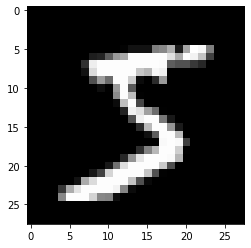

In [102]:
image = X_train[0]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [14]:
#Lets scale the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [15]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [17]:
model = Sequential(
    [
        Input(shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(3,3), activation='relu'),
        MaxPool2D((2,2)),
        Conv2D(64, kernel_size=(3,3), activation='relu'),
        MaxPool2D((2,2)),
        Flatten(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ]
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [22]:
#lets train cnn
batch_size = 128
epochs = 8

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
H = model.fit(X_train, 
                y_train, 
                batch_size=batch_size, 
                epochs=epochs, 
                validation_split=0.1)


Epoch 1/8
422/422 [==============================] - 25s 59ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.0318 - val_accuracy: 0.9907
Epoch 2/8
422/422 [==============================] - 25s 59ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0308 - val_accuracy: 0.9912
Epoch 3/8
422/422 [==============================] - 25s 60ms/step - loss: 0.0370 - accuracy: 0.9878 - val_loss: 0.0343 - val_accuracy: 0.9917
Epoch 4/8
422/422 [==============================] - 25s 60ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.0292 - val_accuracy: 0.9918
Epoch 5/8
422/422 [==============================] - 25s 60ms/step - loss: 0.0325 - accuracy: 0.9890 - val_loss: 0.0304 - val_accuracy: 0.9918
Epoch 6/8
422/422 [==============================] - 25s 60ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0274 - val_accuracy: 0.9930
Epoch 7/8
422/422 [==============================] - 25s 60ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0269 - val_accuracy: 0.9923

In [24]:
#lets evaluate the score
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.027388058602809906
Test accuracy: 0.9912999868392944


In [25]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test, batch_size=128)

In [30]:
print(classification_report(y_test.argmax(axis=1), 
                            predictions.argmax(axis=1),
                            target_names=[str(x) for x in range(0, 10)]))
# looks like 2 & 5 are confused more often                            

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



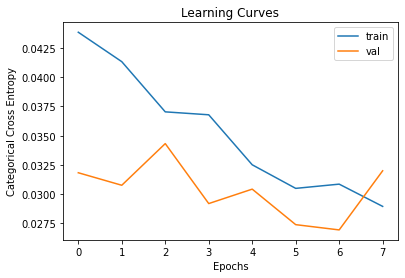

In [32]:
# ploting the learning curves
import matplotlib.pyplot as plt

plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.plot(H.history['loss'], label='train')
plt.plot(H.history['val_loss'], label='val')
plt.legend()
plt.show()
# looks likeat 6 epoch is good